In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('NY data summary lag 12.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,215.719341,5.93,46445,18798.114,4.8,1096833.984,673.0543,32.90%,214701,0.90%,5852.065587,2.39,186.9
1,4/1/2005,216.433534,5.86,50442,18825.633,4.8,1152815.433,673.0543,32.90%,215976,0.80%,4700.094832,2.74,187.9
2,5/1/2005,216.619664,5.72,50442,18825.633,4.7,1152815.433,673.0543,32.90%,215976,0.80%,4978.336136,2.65,188.4
3,6/1/2005,216.195575,5.58,50442,18825.633,4.8,1152815.433,673.0543,32.90%,215976,0.80%,4541.492838,2.49,187.6
4,7/1/2005,215.050631,5.70,50442,18825.633,4.8,1152815.433,673.0543,32.70%,218751,0.90%,4545.705558,2.50,189.2
5,8/1/2005,213.097963,5.82,50442,18825.633,4.9,1152815.433,673.0543,32.70%,218751,0.90%,5644.986814,2.24,191.3
6,9/1/2005,213.026350,5.77,50442,18825.633,5.0,1152815.433,673.0543,32.70%,218751,0.90%,4939.945161,1.93,195.5
7,10/1/2005,213.028942,6.07,50442,18825.633,5.0,1152815.433,673.0543,32.50%,222198,0.90%,4275.704563,1.99,194.5
8,11/1/2005,213.161021,6.33,50442,18825.633,5.0,1152815.433,673.0543,32.50%,222198,0.90%,4456.121242,2.27,193.1
9,12/1/2005,213.254773,6.27,50442,18825.633,4.9,1152815.433,673.0543,32.50%,222198,0.90%,4594.430120,2.47,191.8


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,215.719341,5.93,46445,18798.114,4.8,1096833.984,673.0543,214701,5852.065587,2.39,186.9,32.9,0.9
1,4/1/2005,216.433534,5.86,50442,18825.633,4.8,1152815.433,673.0543,215976,4700.094832,2.74,187.9,32.9,0.8
2,5/1/2005,216.619664,5.72,50442,18825.633,4.7,1152815.433,673.0543,215976,4978.336136,2.65,188.4,32.9,0.8
3,6/1/2005,216.195575,5.58,50442,18825.633,4.8,1152815.433,673.0543,215976,4541.492838,2.49,187.6,32.9,0.8
4,7/1/2005,215.050631,5.70,50442,18825.633,4.8,1152815.433,673.0543,218751,4545.705558,2.50,189.2,32.7,0.9


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,46445,18798.114,4.8,1096833.984,673.0543,214701,5852.065587,2.39,186.900,32.9,0.9
1,5.86,50442,18825.633,4.8,1152815.433,673.0543,215976,4700.094832,2.74,187.900,32.9,0.8
2,5.72,50442,18825.633,4.7,1152815.433,673.0543,215976,4978.336136,2.65,188.400,32.9,0.8
3,5.58,50442,18825.633,4.8,1152815.433,673.0543,215976,4541.492838,2.49,187.600,32.9,0.8
4,5.70,50442,18825.633,4.8,1152815.433,673.0543,218751,4545.705558,2.50,189.200,32.7,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.44,73093,19322.607,4.9,1699894.281,573.4152,243963,4041.021003,2.98,225.474,28.5,3.2
138,3.46,73093,19322.607,4.9,1699894.281,573.4152,243963,3512.213575,2.52,226.127,28.5,3.2
139,3.47,73093,19322.607,4.8,1699894.281,573.4152,244455,3988.185341,2.13,225.612,28.0,2.9
140,3.77,73093,19322.607,4.7,1699894.281,573.4152,244455,3415.737205,2.27,225.624,28.0,2.9


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),142.0,4.834930e+00,1.054379,3.350000e+00,3.925000e+00,4.555000e+00,5.927500e+00,6.760000e+00
Personal_Income,142.0,5.968803e+04,6644.709225,4.644500e+04,5.463200e+04,5.880600e+04,6.347900e+04,7.309300e+04
Resident_Population,142.0,1.911510e+04,174.878994,1.879811e+04,1.896850e+04,1.910974e+04,1.928093e+04,1.933478e+04
Unemployment_Rate,142.0,6.563380e+00,1.817663,4.200000e+00,4.800000e+00,6.150000e+00,8.600000e+00,9.300000e+00
GDP,142.0,1.385070e+06,179563.861382,1.096834e+06,1.225295e+06,1.355502e+06,1.509213e+06,1.699894e+06
Crime_Rate,142.0,6.058368e+02,32.364803,5.518095e+02,5.806771e+02,5.967001e+02,6.239068e+02,6.730543e+02
Median_Debt,142.0,2.438106e+05,9135.665436,2.147010e+05,2.439630e+05,2.459110e+05,2.502992e+05,2.531410e+05
New_Structures,142.0,3.422581e+03,2394.003216,1.017219e+03,1.811915e+03,3.181244e+03,4.370401e+03,1.751628e+04
Economic_Conditions_Index,142.0,2.330282e+00,1.402109,-3.190000e+00,2.310000e+00,2.750000e+00,3.050000e+00,4.050000e+00
CPI less shelter,142.0,2.141817e+02,12.866480,1.869000e+02,2.036525e+02,2.155000e+02,2.256270e+02,2.302770e+02


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.038593,-1.993018,-1.812619,-0.970136,-1.605201,2.076871,-3.186373,1.014821,0.042592,-2.120369,0.413207,-1.528433
1,0.972203,-1.391487,-1.655258,-0.970136,-1.293438,2.076871,-3.046810,0.533631,0.292216,-2.042648,0.413207,-1.570348
2,0.839424,-1.391487,-1.655258,-1.025152,-1.293438,2.076871,-3.046810,0.649855,0.228027,-2.003787,0.413207,-1.570348
3,0.706644,-1.391487,-1.655258,-0.970136,-1.293438,2.076871,-3.046810,0.467381,0.113913,-2.065964,0.413207,-1.570348
4,0.820455,-1.391487,-1.655258,-0.970136,-1.293438,2.076871,-2.743055,0.469141,0.121045,-1.941610,0.300802,-1.528433
...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.322987,2.017390,1.186558,-0.915120,1.753271,-1.001754,0.016678,0.258329,0.463386,0.877654,-2.059701,-0.564381
138,-1.304019,2.017390,1.186558,-0.915120,1.753271,-1.001754,0.016678,0.037440,0.135309,0.928406,-2.059701,-0.564381
139,-1.294534,2.017390,1.186558,-0.970136,1.753271,-1.001754,0.070533,0.236259,-0.142843,0.888380,-2.340713,-0.690127
140,-1.010007,2.017390,1.186558,-1.025152,1.753271,-1.001754,0.070533,-0.002859,-0.042994,0.889312,-2.340713,-0.690127


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

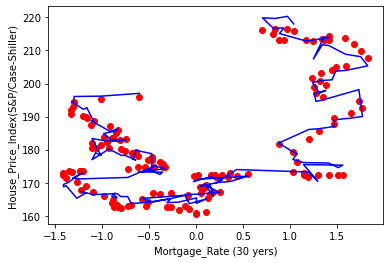

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.92
Accuracy: 98.94 %.


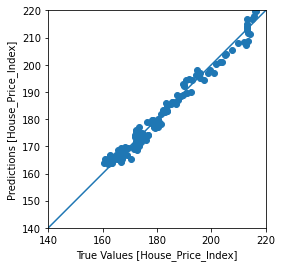

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9795284436665078

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,2.010680
1,9.050619
2,1.051283
3,4.998046
4,-4.732747
5,-0.435616
6,-9.206075
7,0.746798
8,-0.086307
9,-5.068806


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[217.99335621 220.29750694 219.65091733 219.84765218 216.73370587
 216.76913016 215.09329146 212.82125946 213.90765538 214.06123996
 207.39238917 211.70682063 211.4889358  208.84956335 208.43350174
 208.09734182 205.3391635  203.97875987 203.72192212 201.12118328
 200.87336503 200.29898543 197.08119857 197.92683209 196.89614843
 194.56862939 195.06828639 198.16757767 190.04806102 189.54382325
 189.02513787 186.99870058 186.32474437 186.1188683  181.98476274
 179.38696462 178.83624281 177.03738075 176.10873289 175.96275361
 174.58310202 175.32752983 175.48309742 170.48458499 173.2596651
 173.99355164 169.80638835 170.84143107 171.85774856 170.37523593
 171.0510214  172.02768923 170.41344857 170.32529689 170.01554507
 169.29346686 168.85557521 169.66273621 165.93082789 169.57721841
 168.79572037 167.11559573 166.64809081 166.38508089 165.26920266
 164.67776274 164.16978702 165.24863184 165.41174425 166.22867738
 163.66802146 165.108722   163.8007237  165.41544477 164.16066163
 163.974143

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,217.993356
1,220.297507
2,219.650917
3,219.847652
4,216.733706
...,...
137,194.598664
138,194.242908
139,196.072011
140,196.177217


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,1.361058,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
Personal_Income,-1.993018,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,...,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390
Resident_Population,-1.812619,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,...,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558
Unemployment_Rate,-0.970136,-0.970136,-1.025152,-0.970136,-0.970136,-0.915120,-0.860105,-0.860105,-0.860105,-0.915120,...,-0.970136,-0.970136,-0.970136,-0.915120,-0.915120,-0.915120,-0.915120,-0.970136,-1.025152,-1.080168
GDP,-1.605201,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,...,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271
Crime_Rate,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,...,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754
Median_Debt,-3.186373,-3.046810,-3.046810,-3.046810,-2.743055,-2.743055,-2.743055,-2.365743,-2.365743,-2.365743,...,0.240636,0.092644,0.092644,0.092644,0.016678,0.016678,0.016678,0.070533,0.070533,0.070533
New_Structures,1.014821,0.533631,0.649855,0.467381,0.469141,0.928322,0.633819,0.356358,0.431720,0.489493,...,0.119117,0.498359,0.297782,-0.063156,0.121251,0.258329,0.037440,0.236259,-0.002859,0.526779
Economic_Conditions_Index,0.042592,0.292216,0.228027,0.113913,0.121045,-0.064390,-0.285485,-0.242693,-0.042994,0.099649,...,0.563236,0.520443,0.477651,0.556104,0.741539,0.463386,0.135309,-0.142843,-0.042994,0.028328
CPI less shelter,-2.120369,-2.042648,-2.003787,-2.065964,-1.941610,-1.778395,-1.451965,-1.529687,-1.638497,-1.739534,...,0.768300,0.869571,0.901437,0.924909,0.867706,0.877654,0.928406,0.888380,0.889312,0.906722


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,132,133,134,135,136,137,138,139,140,141
0,Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
1,Personal_Income,-1.993018,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,-1.391487,...,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390,2.017390
2,Resident_Population,-1.812619,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,-1.655258,...,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558,1.186558
3,Unemployment_Rate,-0.970136,-0.970136,-1.025152,-0.970136,-0.970136,-0.915120,-0.860105,-0.860105,-0.860105,...,-0.970136,-0.970136,-0.970136,-0.915120,-0.915120,-0.915120,-0.915120,-0.970136,-1.025152,-1.080168
4,GDP,-1.605201,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,-1.293438,...,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271,1.753271
5,Crime_Rate,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,2.076871,...,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754,-1.001754
6,Median_Debt,-3.186373,-3.046810,-3.046810,-3.046810,-2.743055,-2.743055,-2.743055,-2.365743,-2.365743,...,0.240636,0.092644,0.092644,0.092644,0.016678,0.016678,0.016678,0.070533,0.070533,0.070533
7,New_Structures,1.014821,0.533631,0.649855,0.467381,0.469141,0.928322,0.633819,0.356358,0.431720,...,0.119117,0.498359,0.297782,-0.063156,0.121251,0.258329,0.037440,0.236259,-0.002859,0.526779
8,Economic_Conditions_Index,0.042592,0.292216,0.228027,0.113913,0.121045,-0.064390,-0.285485,-0.242693,-0.042994,...,0.563236,0.520443,0.477651,0.556104,0.741539,0.463386,0.135309,-0.142843,-0.042994,0.028328
9,CPI less shelter,-2.120369,-2.042648,-2.003787,-2.065964,-1.941610,-1.778395,-1.451965,-1.529687,-1.638497,...,0.768300,0.869571,0.901437,0.924909,0.867706,0.877654,0.928406,0.888380,0.889312,0.906722


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),2.010680
1,Personal_Income,9.050619
2,Resident_Population,1.051283
3,Unemployment_Rate,4.998046
4,GDP,-4.732747
5,Crime_Rate,-0.435616
6,Median_Debt,-9.206075
7,New_Structures,0.746798
8,Economic_Conditions_Index,-0.086307
9,CPI less shelter,-5.068806


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

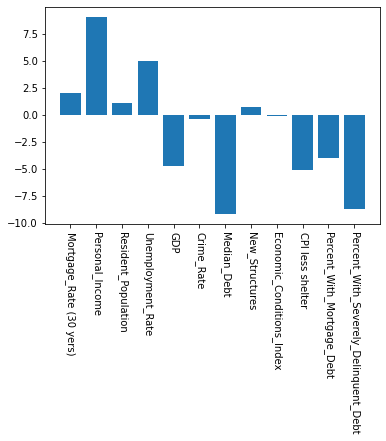

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,1/1/2017,187.094273,4.15,73093,19322.607,4.5,1699894.281,538.8951,28.40%,245031,2.90%,3296.999883,2.37,227.812
1,2/1/2017,187.317164,4.17,76565,19276.644,4.5,1799148.324,538.8951,28.40%,245031,2.90%,4834.364431,2.33,228.898
2,3/1/2017,188.763919,4.20,76565,19276.644,4.4,1799148.324,538.8951,28.40%,245031,2.90%,4957.019871,2.56,228.609
3,4/1/2017,189.525485,4.05,76565,19276.644,4.5,1799148.324,538.8951,28.40%,245422,2.60%,2877.676720,2.69,228.849
4,5/1/2017,189.956917,4.01,76565,19276.644,4.5,1799148.324,538.8951,28.40%,245422,2.60%,5466.221827,2.80,228.984
5,6/1/2017,190.052705,3.90,76565,19276.644,4.6,1799148.324,538.8951,28.40%,245422,2.60%,3850.093982,3.07,229.351
6,7/1/2017,190.840081,3.97,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,4010.836341,3.04,228.127
7,8/1/2017,191.882768,3.88,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,3118.553708,2.92,228.207
8,9/1/2017,192.949840,3.81,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,2928.686450,2.79,230.219
9,10/1/2017,194.414177,3.90,76565,19276.644,4.5,1799148.324,538.8951,27.70%,245359,2.40%,3500.473181,2.54,229.361


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2017,187.094273,4.15,73093,19322.607,4.5,1699894.281,538.8951,245031,3296.999883,2.37,227.812,28.4,2.9
1,2/1/2017,187.317164,4.17,76565,19276.644,4.5,1799148.324,538.8951,245031,4834.364431,2.33,228.898,28.4,2.9
2,3/1/2017,188.763919,4.20,76565,19276.644,4.4,1799148.324,538.8951,245031,4957.019871,2.56,228.609,28.4,2.9
3,4/1/2017,189.525485,4.05,76565,19276.644,4.5,1799148.324,538.8951,245422,2877.676720,2.69,228.849,28.4,2.6
4,5/1/2017,189.956917,4.01,76565,19276.644,4.5,1799148.324,538.8951,245422,5466.221827,2.80,228.984,28.4,2.6


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.15,73093,19322.607,4.5,1699894.281,538.8951,245031,3296.999883,2.37,227.812,28.4,2.9
1,4.17,76565,19276.644,4.5,1799148.324,538.8951,245031,4834.364431,2.33,228.898,28.4,2.9
2,4.20,76565,19276.644,4.4,1799148.324,538.8951,245031,4957.019871,2.56,228.609,28.4,2.9
3,4.05,76565,19276.644,4.5,1799148.324,538.8951,245422,2877.676720,2.69,228.849,28.4,2.6
4,4.01,76565,19276.644,4.5,1799148.324,538.8951,245422,5466.221827,2.80,228.984,28.4,2.6
5,3.90,76565,19276.644,4.6,1799148.324,538.8951,245422,3850.093982,3.07,229.351,28.4,2.6
6,3.97,76565,19276.644,4.6,1799148.324,538.8951,245631,4010.836341,3.04,228.127,28.0,2.5
7,3.88,76565,19276.644,4.6,1799148.324,538.8951,245631,3118.553708,2.92,228.207,28.0,2.5
8,3.81,76565,19276.644,4.6,1799148.324,538.8951,245631,2928.686450,2.79,230.219,28.0,2.5
9,3.90,76565,19276.644,4.5,1799148.324,538.8951,245359,3500.473181,2.54,229.361,27.7,2.4


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,3.992500e+00,1.256348e-01,3.810000e+00,3.900000e+00,3.960000e+00,4.075000e+00,4.200000e+00
Personal_Income,12.0,7.627567e+04,1.002280e+03,7.309300e+04,7.656500e+04,7.656500e+04,7.656500e+04,7.656500e+04
Resident_Population,12.0,1.928047e+04,1.326838e+01,1.927664e+04,1.927664e+04,1.927664e+04,1.927664e+04,1.932261e+04
Unemployment_Rate,12.0,4.516667e+00,7.177406e-02,4.400000e+00,4.500000e+00,4.500000e+00,4.600000e+00,4.600000e+00
GDP,12.0,1.790877e+06,2.865217e+04,1.699894e+06,1.799148e+06,1.799148e+06,1.799148e+06,1.799148e+06
Crime_Rate,12.0,5.388951e+02,1.187420e-13,5.388951e+02,5.388951e+02,5.388951e+02,5.388951e+02,5.388951e+02
Median_Debt,12.0,2.453608e+05,2.249392e+02,2.450310e+05,2.452770e+05,2.453905e+05,2.454742e+05,2.456310e+05
New_Structures,12.0,3.849055e+03,8.434334e+02,2.877677e+03,3.252388e+03,3.675284e+03,4.216718e+03,5.466222e+03
Economic_Conditions_Index,12.0,2.719167e+00,2.370063e-01,2.330000e+00,2.555000e+00,2.750000e+00,2.837500e+00,3.070000e+00
CPI less shelter,12.0,2.288540e+02,6.389335e-01,2.278120e+02,2.285085e+02,2.288845e+02,2.290757e+02,2.302190e+02


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.649605,2.017390,1.186558,-1.135183,1.753271,-2.068348,0.133583,-0.052457,0.028328,1.059366,-2.115904,-0.690127
1,-0.630636,2.539911,0.923731,-1.135183,2.306022,-2.068348,0.133583,0.589716,-0.000201,1.143772,-2.115904,-0.690127
2,-0.602184,2.539911,0.923731,-1.190199,2.306022,-2.068348,0.133583,0.640951,0.163838,1.121310,-2.115904,-0.690127
3,-0.744447,2.539911,0.923731,-1.135183,2.306022,-2.068348,0.176382,-0.227612,0.256555,1.139963,-2.115904,-0.815873
4,-0.782384,2.539911,0.923731,-1.135183,2.306022,-2.068348,0.176382,0.853650,0.335008,1.150456,-2.115904,-0.815873
5,-0.886711,2.539911,0.923731,-1.080168,2.306022,-2.068348,0.176382,0.178576,0.527575,1.178980,-2.115904,-0.815873
6,-0.820322,2.539911,0.923731,-1.080168,2.306022,-2.068348,0.199259,0.245720,0.506179,1.083849,-2.340713,-0.857788
7,-0.905680,2.539911,0.923731,-1.080168,2.306022,-2.068348,0.199259,-0.126995,0.420594,1.090066,-2.340713,-0.857788
8,-0.972070,2.539911,0.923731,-1.080168,2.306022,-2.068348,0.199259,-0.206305,0.327876,1.246442,-2.340713,-0.857788
9,-0.886711,2.539911,0.923731,-1.135183,2.306022,-2.068348,0.169486,0.032536,0.149573,1.179757,-2.509321,-0.899703


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[194.43817497 196.36731893 196.28751426 196.22069452 196.89194441
 196.29180321 198.00479626 197.530695   196.55334408 198.28859806
 198.6201935  198.24762775]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,194.438175
1,196.367319
2,196.287514
3,196.220695
4,196.891944
5,196.291803
6,198.004796
7,197.530695
8,196.553344
9,198.288598
